In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
stock1 = pd.read_csv('../data/005380.csv')
stock2 = pd.read_csv('../data/005930.csv')
stock3 = pd.read_csv('../data/015760.csv')
stock4 = pd.read_csv('../data/035420.csv')
stock5 = pd.read_csv('../data/051910.csv')
stock6 = pd.read_csv('../data/068270.csv')

In [14]:
stock1

,date,open,high,low,close,volume,per,pbr,roe,market_kospi_ma5_ratio,market_kospi_ma20_ratio,market_kospi_ma60_ratio,market_kospi_ma120_ratio,bond_k3y_ma5_ratio,bond_k3y_ma20_ratio,bond_k3y_ma60_ratio,bond_k3y_ma120_ratio
0,20160104,147500.0,148000.0,143500.0,144000.0,445332.0,7.67,0.43,6.06,1.014067,1.020727,1.003090,0.982268,1.000721,1.002284,1.000295,1.000591
1,20160105,143000.0,145000.0,142000.0,143500.0,530496.0,7.67,0.43,6.06,1.015097,1.030705,1.012278,0.991928,1.000419,1.002215,1.000242,1.000456
2,20160106,144000.0,145000.0,139000.0,140000.0,769406.0,7.67,0.43,6.06,1.009296,1.035409,1.016705,0.997317,1.000556,1.002633,1.000726,1.000861
3,20160107,138500.0,140000.0,137500.0,137500.0,586187.0,7.67,0.43,6.06,0.996236,1.024228,1.005281,0.987199,1.000638,1.002920,1.001104,1.001178
4,20160108,134500.0,138000.0,133500.0,136500.0,888701.0,7.67,0.43,6.06,1.000425,1.027504,1.009328,0.992360,0.999909,1.002073,1.000535,1.000542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,20191223,124000.0,125000.0,122000.0,122500.0,1462906.0,7.56,0.43,6.08,0.997957,1.015010,1.002079,1.013144,1.000018,0.998755,0.997720,0.995154
975,20191224,123000.0,123000.0,121500.0,122000.0,600726.0,7.56,0.43,6.08,0.988089,1.002355,0.988296,1.000266,1.000299,0.999169,0.998123,0.995479
976,20191226,122500.0,123000.0,121500.0,122500.0,552469.0,7.56,0.43,6.08,1.007469,1.022626,1.007865,1.021415,1.000245,0.999267,0.998169,0.995454
977,20191227,121000.0,121000.0,120000.0,120500.0,422565.0,7.56,0.43,6.08,1.017427,1.035297,1.021272,1.036185,0.999973,0.999187,0.997981,0.995209


In [15]:
df = pd.concat([stock1[['close']],stock2[['close']],stock3[['close']],stock4[['close']],stock5[['close']],stock6[['close']]], axis=1)
df

,close,close,close,close,close,close
0,144000.0,24100.0,50000.0,126400.0,341500.0,81873.0
1,143500.0,24160.0,50700.0,127400.0,339500.0,82883.0
2,140000.0,23500.0,50800.0,124600.0,338000.0,84168.0
3,137500.0,23260.0,50300.0,130400.0,323000.0,84168.0
4,136500.0,23420.0,49900.0,130400.0,330000.0,88573.0
...,...,...,...,...,...,...
974,122500.0,56500.0,27900.0,183500.0,313000.0,178134.0
975,122000.0,55800.0,27900.0,186500.0,312500.0,176701.0
976,122500.0,NaN,27650.0,NaN,308000.0,181000.0
977,120500.0,NaN,27750.0,NaN,310500.0,184000.0


In [16]:
df.columns = ['close1','close2','close3','close4','close5','close6']

In [17]:
df

,close1,close2,close3,close4,close5,close6
0,144000.0,24100.0,50000.0,126400.0,341500.0,81873.0
1,143500.0,24160.0,50700.0,127400.0,339500.0,82883.0
2,140000.0,23500.0,50800.0,124600.0,338000.0,84168.0
3,137500.0,23260.0,50300.0,130400.0,323000.0,84168.0
4,136500.0,23420.0,49900.0,130400.0,330000.0,88573.0
...,...,...,...,...,...,...
974,122500.0,56500.0,27900.0,183500.0,313000.0,178134.0
975,122000.0,55800.0,27900.0,186500.0,312500.0,176701.0
976,122500.0,NaN,27650.0,NaN,308000.0,181000.0
977,120500.0,NaN,27750.0,NaN,310500.0,184000.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close1  979 non-null    float64
 1   close2  976 non-null    float64
 2   close3  979 non-null    float64
 3   close4  976 non-null    float64
 4   close5  979 non-null    float64
 5   close6  979 non-null    float64
dtypes: float64(6)
memory usage: 46.0 KB


In [20]:
df = df.fillna(method='pad')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close1  979 non-null    float64
 1   close2  979 non-null    float64
 2   close3  979 non-null    float64
 3   close4  979 non-null    float64
 4   close5  979 non-null    float64
 5   close6  979 non-null    float64
dtypes: float64(6)
memory usage: 46.0 KB


In [22]:
cor_matrix = df.iloc[:,0:].corr()

In [23]:
cor_matrix

,close1,close2,close3,close4,close5,close6
close1,1.000000,0.049028,0.360230,0.447794,0.075520,-0.193919
close2,0.049028,1.000000,-0.768895,0.319207,0.633561,0.592703
close3,0.360230,-0.768895,1.000000,0.123893,-0.553424,-0.701240
close4,0.447794,0.319207,0.123893,1.000000,-0.123924,-0.111734
close5,0.075520,0.633561,-0.553424,-0.123924,1.000000,0.730712
close6,-0.193919,0.592703,-0.701240,-0.111734,0.730712,1.000000


In [24]:
stocks = cor_matrix.index.values

In [25]:
stocks

array(['close1', 'close2', 'close3', 'close4', 'close5', 'close6'],
      dtype=object)

In [22]:
cor_matrix = np.asmatrix(cor_matrix)

In [23]:
G = nx.from_numpy_matrix(cor_matrix)

In [24]:
G = nx.relabel_nodes(G, lambda x: stocks[x])

In [25]:
G.edges(data=True)

EdgeDataView([('close1', 'close1', {'weight': 1.0}), ('close1', 'close2', {'weight': 0.05511063110705296}), ('close1', 'close3', {'weight': 0.35771519943343416}), ('close1', 'close4', {'weight': 0.45913307228628786}), ('close1', 'close5', {'weight': 0.07471697439320875}), ('close1', 'close6', {'weight': -0.19371684272308828}), ('close2', 'close2', {'weight': 1.0}), ('close2', 'close3', {'weight': -0.7680123978200368}), ('close2', 'close4', {'weight': 0.31278413492565155}), ('close2', 'close5', {'weight': 0.6372354477965572}), ('close2', 'close6', {'weight': 0.594082574486717}), ('close3', 'close3', {'weight': 1.0}), ('close3', 'close4', {'weight': 0.13143187098104422}), ('close3', 'close5', {'weight': -0.5553105459499019}), ('close3', 'close6', {'weight': -0.701912833102376}), ('close4', 'close4', {'weight': 1.0}), ('close4', 'close5', {'weight': -0.12306113566338495}), ('close4', 'close6', {'weight': -0.11351295583551327}), ('close5', 'close5', {'weight': 1.0}), ('close5', 'close6', {

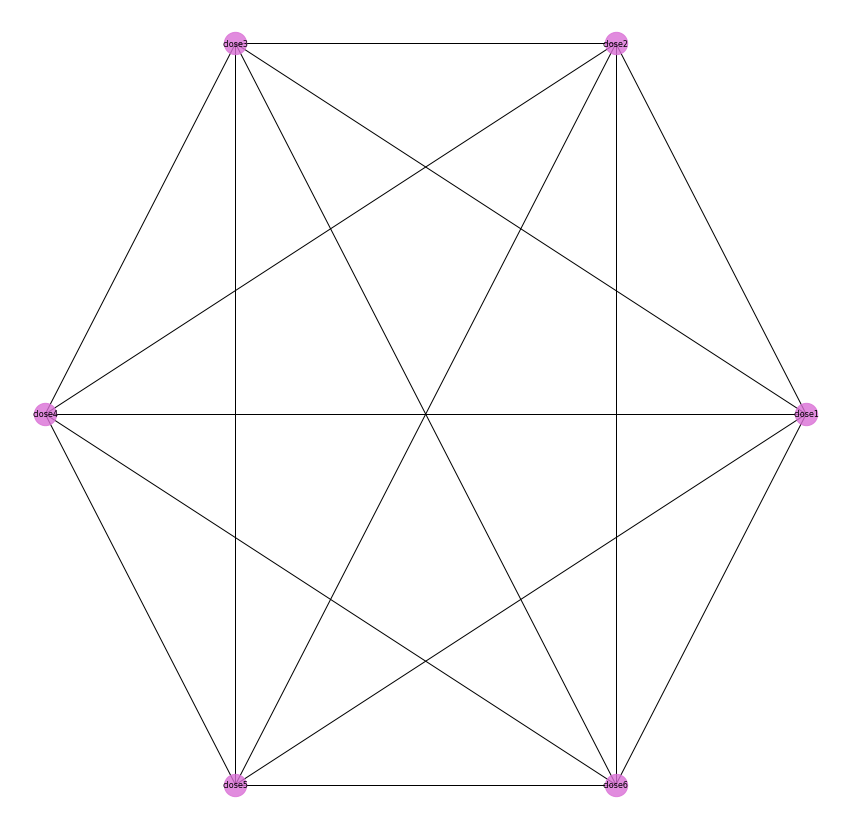

In [26]:
def create_corr_network_1(G):
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    positions=nx.circular_layout(G)
    
    plt.figure(figsize=(15,15))
    
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                              node_size=500,alpha=0.8)
    
    nx.draw_networkx_labels(G, positions,font_size=8,
                           font_family='sans-serif')
    
    nx.draw_networkx_edges(G, positions,edgelist=edges, style='solid')
    
    plt.axis('off')
    
    plt.savefig("part1.png",format="PNG")
    plt.show()
    
create_corr_network_1(G)

In [27]:
def create_corr_network_2(G, corr_direction):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] < 0:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >=0:
                H.remove_edge(stock1,stock2)
    edges, weights = zip(*nx.get_edge_attributes(H, 'weight').items())
    
    positions = nx.circular_layout(H)
    
    plt.figure(figsize=(15,15))
    
    nx.draw_networkx_nodes(H, positions, node_color='#DA70D6',
                          node_size=500,alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8,
                           font_family='sans-serif')
    
    nx.draw_networkx_edges(H, positions, edgelist=edges,
                          style='solid')
    
    plt.axis('off')
    plt.savefig("part2" + corr_direction + ".png", format="PNG")
    plt.show()

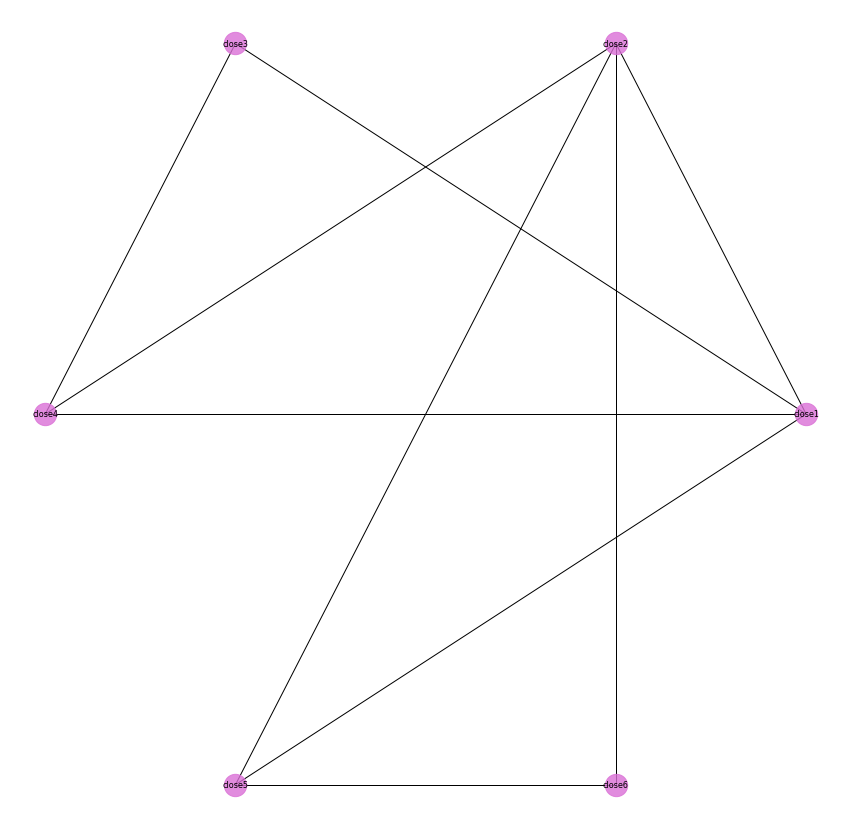

In [28]:
create_corr_network_2(G, corr_direction="positive")

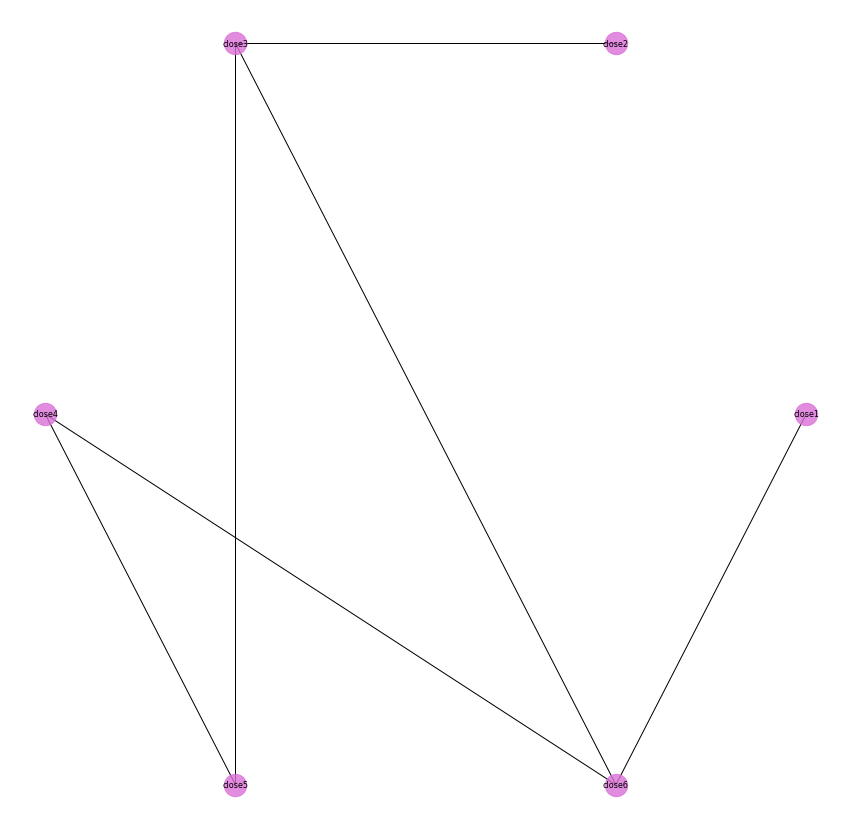

In [29]:
create_corr_network_2(G, corr_direction="negative")

In [30]:
def create_corr_network_3(G, corr_direction):
    H = G.copy()
    
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] < 0:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >= 0:
                H.remove_edge(stock1, stock2)
    
    edges, weights = zip(*nx.get_edge_attributes(H, 'weight').items())
    
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    positions = nx.circular_layout(H)
    
    plt.figure(figsize=(15,15))
    
    nx.draw_networkx_nodes(H, positions, node_color="#DA70D6",
                          node_size=500, alpha=0.8)
    
    nx.draw_networkx_labels(H,positions, font_size=8,
                           font_family='sans-serif')
    
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu
    else:
        edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H,positions,edgelist=edges,style='solid',
                          width=weights,edge_colour=weights, edge_cmap=edge_colour,
                          edge_vmin=min(weights),edge_vmax=max(weights))
    
    plt.axis('off')
    plt.savefig("part3" + corr_direction + ".png", format="PNG")
    plt.show()

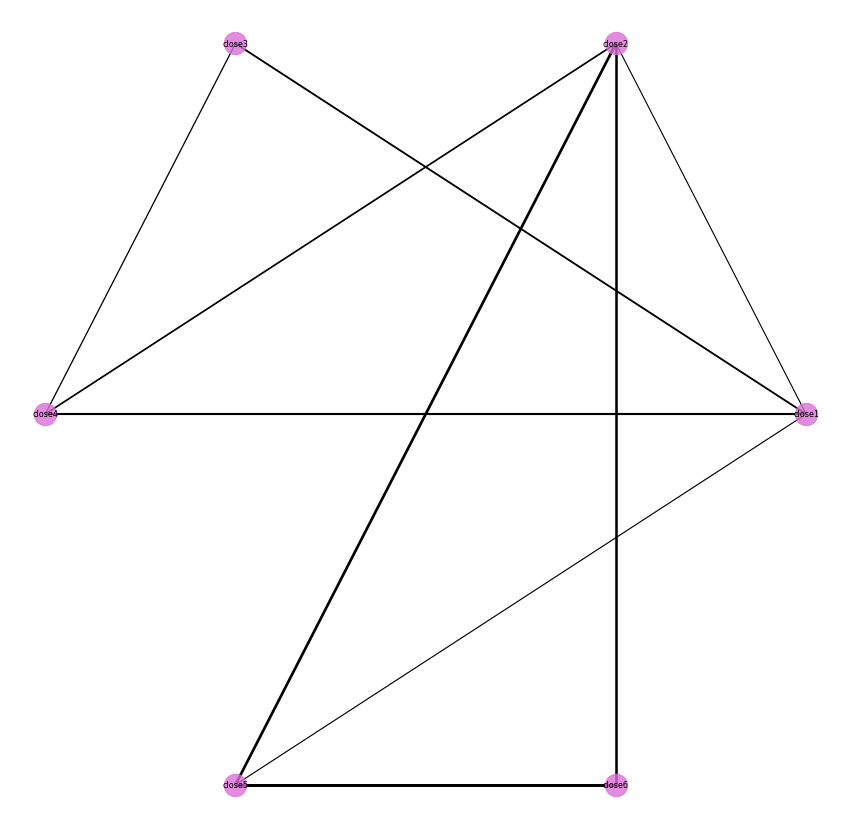

In [31]:
create_corr_network_3(G, corr_direction="positive")

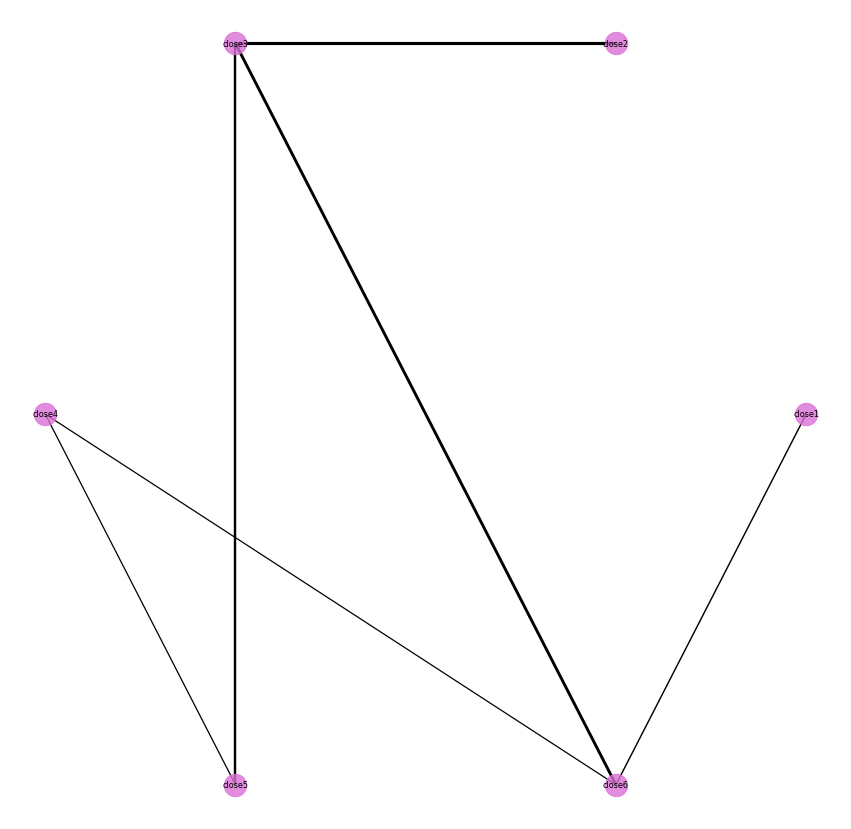

In [32]:
create_corr_network_3(G, corr_direction="negative")

In [33]:
def create_corr_network_4(G, corr_direction, min_correlation):
    H = G.copy()
    
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges, weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    positions = nx.circular_layout(H)
    
    plt.figure(figsize=(15,15))
    
    nx.draw_networkx_nodes(H,positions,node_color="#DA70D6",
                          node_size=500,alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8,
                           font_family='sans-serif')
    
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu
    else:
        edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights,edge_colou=weights,edge_cmap=edge_colour,
                          edge_vmin=min(weights),edge_vmax=max(weights))
    
    plt.axis('off')
    plt.savefig("part4" + corr_direction + ".png", format="PNG")
    plt.show()

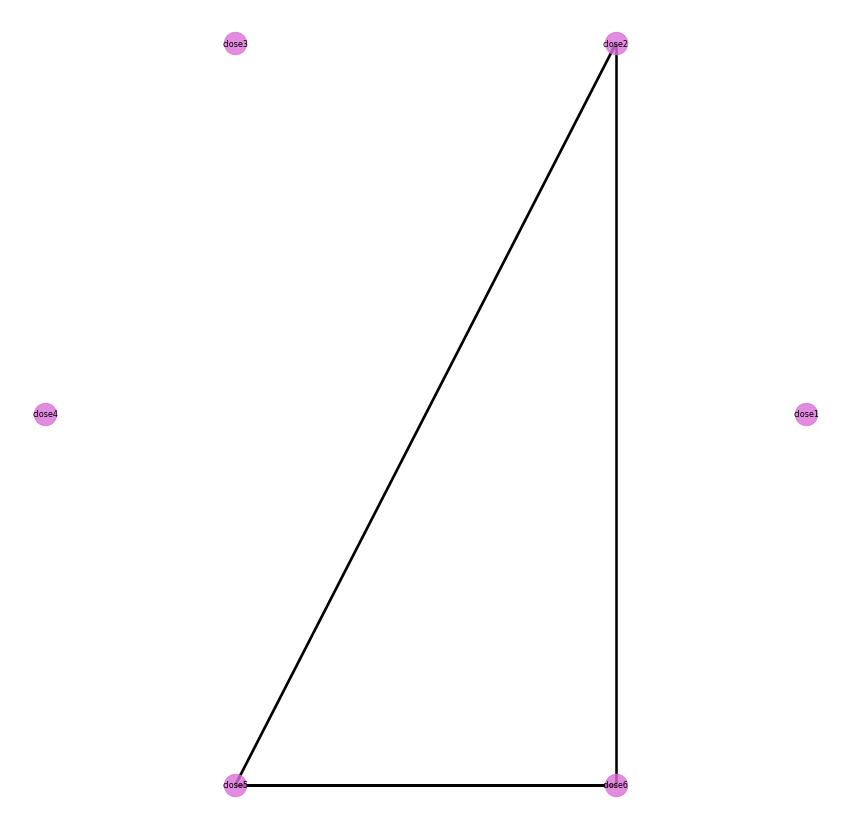

In [34]:
create_corr_network_4(G, corr_direction="positive", min_correlation=0.5)

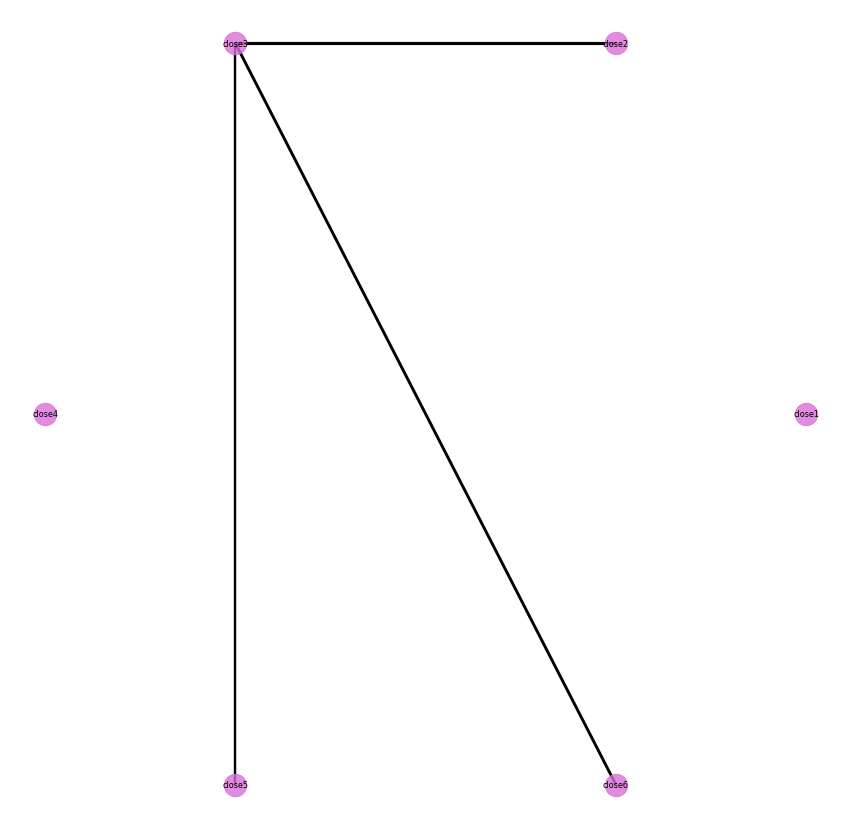

In [35]:
create_corr_network_4(G, corr_direction="negative", min_correlation=-0.5)

In [47]:
def create_corr_network_5(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges, weights = zip(*nx.get_edge_attributes(H, 'weight').items())
    
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    d = dict(nx.degree(H))
    
    nodelist, node_sizes = zip(*d.items())
    
    positions = nx.circular_layout(H)
    
    plt.figure(figsize=(15,15))
    
    nx.draw_networkx_nodes(H,positions,node_color="#DA70D6",nodelist=nodelist,
                          node_size=tuple([x**8 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8,
                           font_family='sans-serif')
    
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu
    else:
        edge_colour = plt.cm.PuRd
        
    centrality = nx.eigenvector_centrality(H)
    print(['%s %0.2f'%(node,centrality[node]) for node in centrality])
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights,edge_colour=weights, edge_cmap=edge_colour,
                          edge_vmin=min(weights), edge_vmax=max(weights))
    
    plt.axis('off')
    plt.savefig("part5" + corr_direction + ".png", format="PNG")
    plt.show()

['close1 0.00', 'close2 0.58', 'close3 0.00', 'close4 0.00', 'close5 0.58', 'close6 0.58']


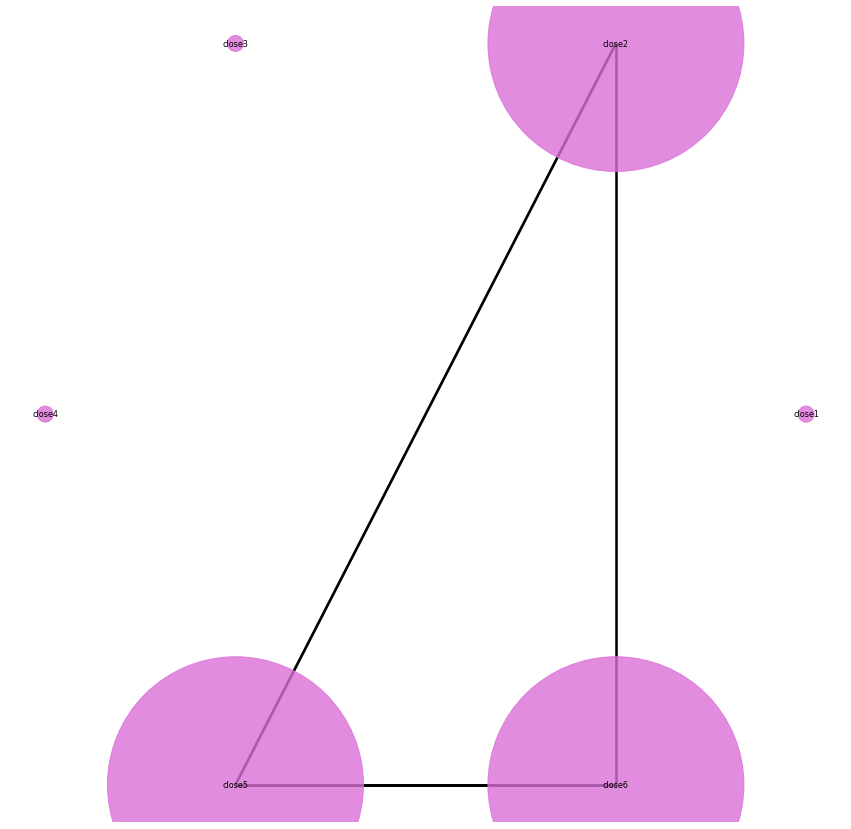

In [48]:
create_corr_network_5(G, corr_direction="positive", min_correlation=0.5)

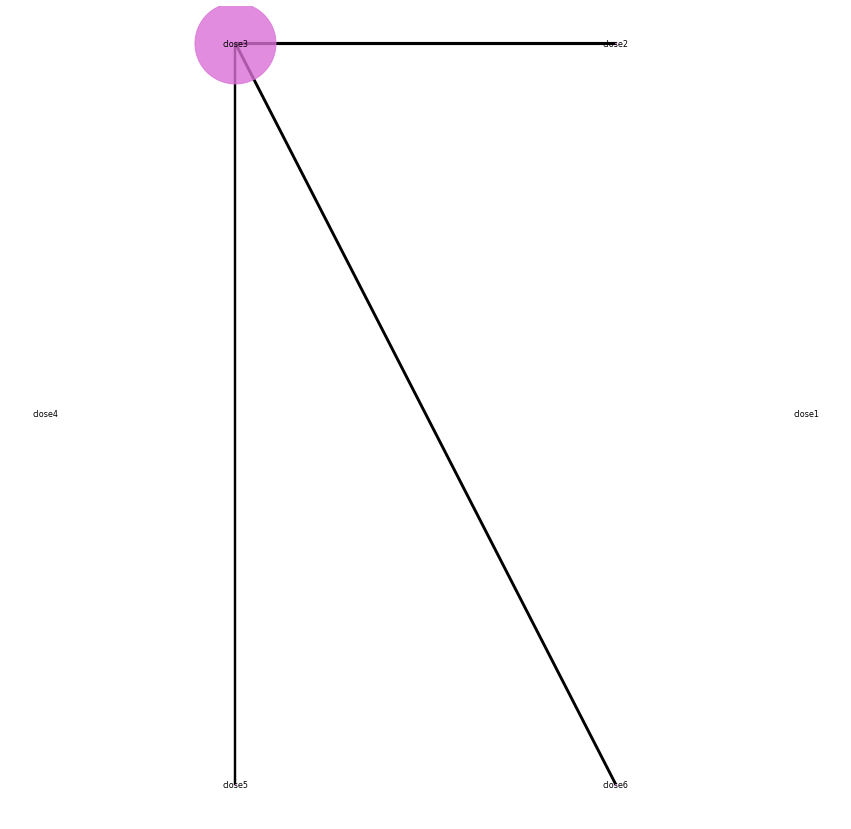

In [38]:
create_corr_network_5(G, corr_direction="negative", min_correlation=-0.5)

In [39]:
dict(nx.degree(G))

{'close1': 7, 'close2': 7, 'close3': 7, 'close4': 7, 'close5': 7, 'close6': 7}

In [40]:
nx.degree(G)._weight